# Exploratory Data Analysis On Terrorism

# Importing all the required libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
data = pd.read_csv(r"C:\Users\saina\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv", encoding="latin1")
df = pd.DataFrame(data)

C:\Users\saina\AppData\Local\Temp\ipykernel_17040\1937948758.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\saina\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv", encoding="latin1")


# Cleaning the data

In [11]:
df = df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
         "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
         "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"}, inplace=True)

# Handling missing values

In [14]:
df["Killed"] = df["Killed"].fillna(0)
df["Wounded"] = df["Wounded"].fillna(0)
df["Casualty"] = df["Killed"] + df["Wounded"]


# Data Visualization

# Year-wise Attacks:

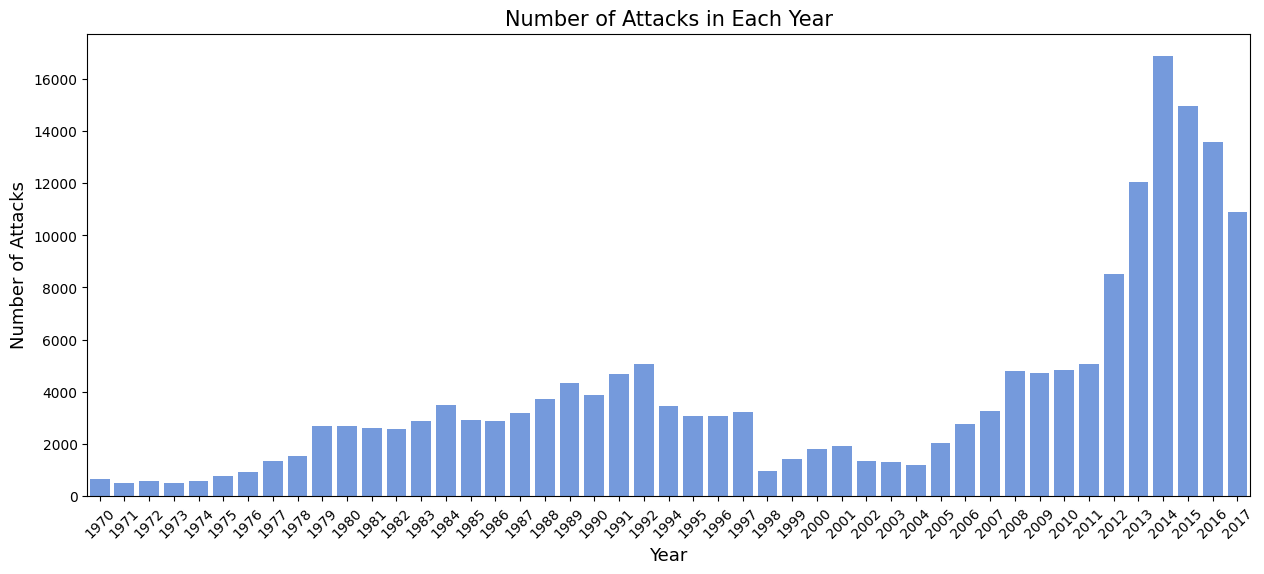

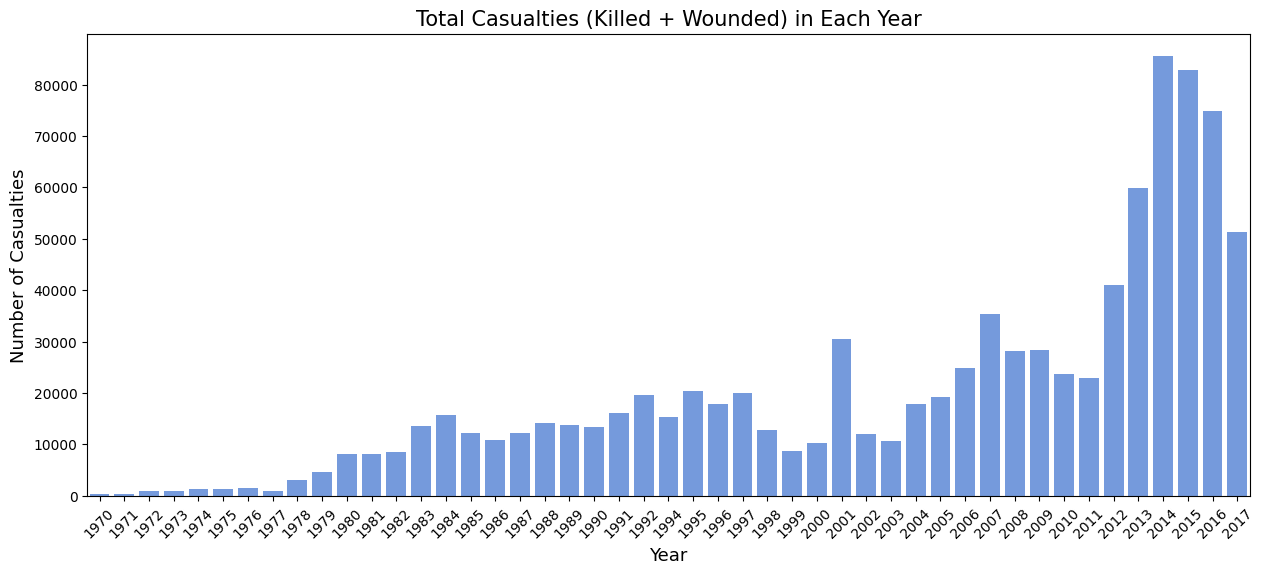

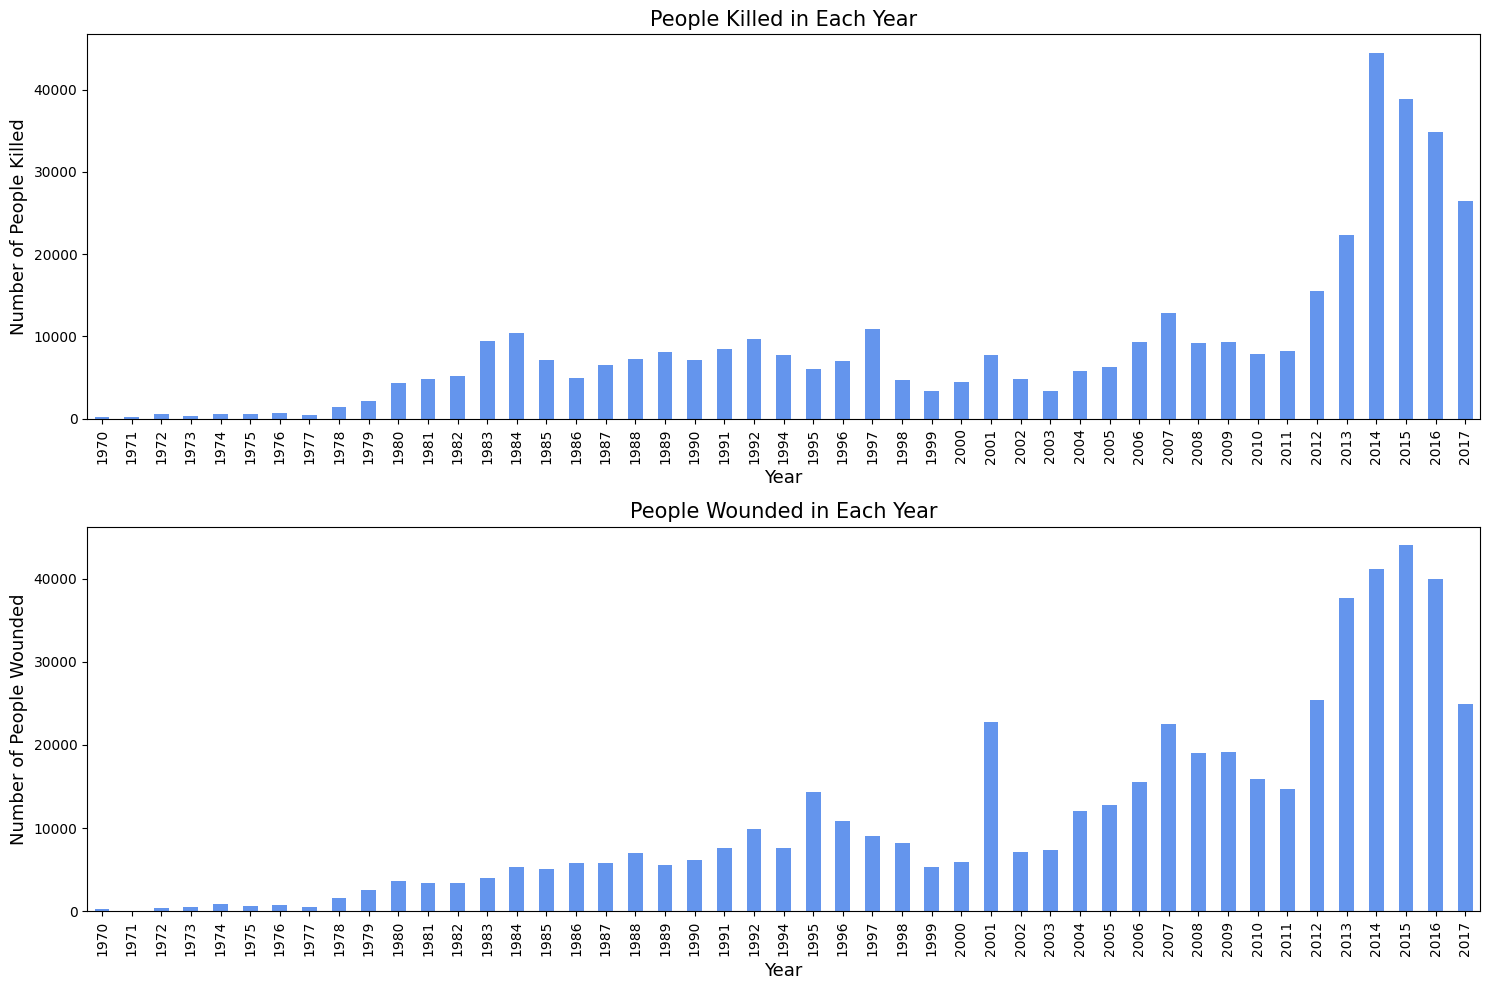

In [17]:
# Number of Attacks in each Year
attacks = df["Year"].value_counts().sort_index()
plt.figure(figsize=(15, 6))
sns.barplot(x=attacks.index, y=attacks.values, color='cornflowerblue')
plt.title("Number of Attacks in Each Year", fontsize=15)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of Attacks", fontsize=13)
plt.xticks(rotation=45)
plt.show()

# Total Casualties (Killed + Wounded) in each Year
yc = df.groupby("Year")["Casualty"].sum()
plt.figure(figsize=(15, 6))
sns.barplot(x=yc.index, y=yc.values, color='cornflowerblue')
plt.title("Total Casualties (Killed + Wounded) in Each Year", fontsize=15)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of Casualties", fontsize=13)
plt.xticks(rotation=45)
plt.show()

# People Killed in each Year
yk = df.groupby("Year")["Killed"].sum()
# People Wounded in each Year
yw = df.groupby("Year")["Wounded"].sum()

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
yk.plot(kind="bar", color="cornflowerblue", ax=ax0)
ax0.set_title("People Killed in Each Year", fontsize=15)
ax0.set_xlabel("Year", fontsize=13)
ax0.set_ylabel("Number of People Killed", fontsize=13)

yw.plot(kind="bar", color="cornflowerblue", ax=ax1)
ax1.set_title("People Wounded in Each Year", fontsize=15)
ax1.set_xlabel("Year", fontsize=13)
ax1.set_ylabel("Number of People Wounded", fontsize=13)

plt.tight_layout()
plt.show()


# Region Wise Attacks Over the Years

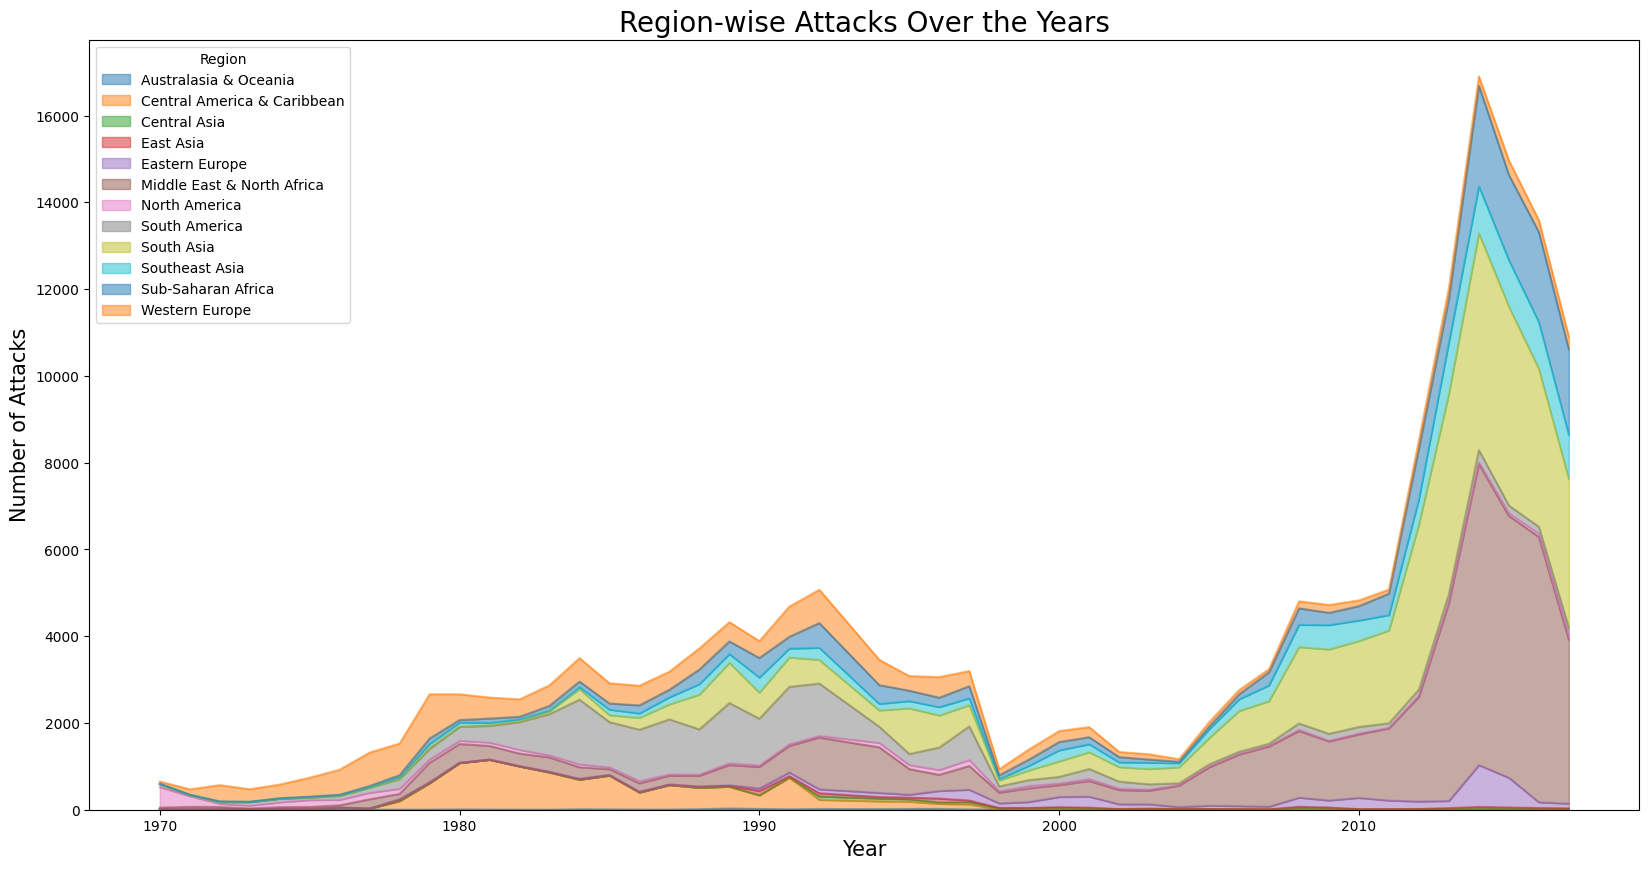

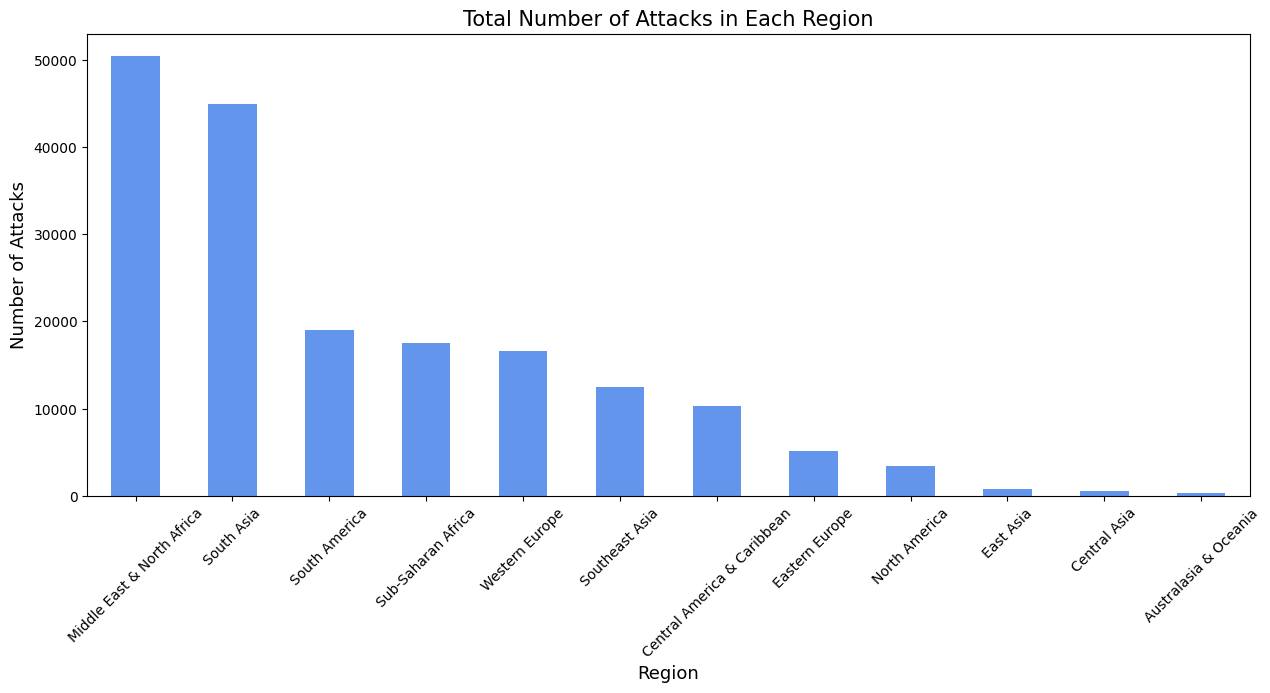

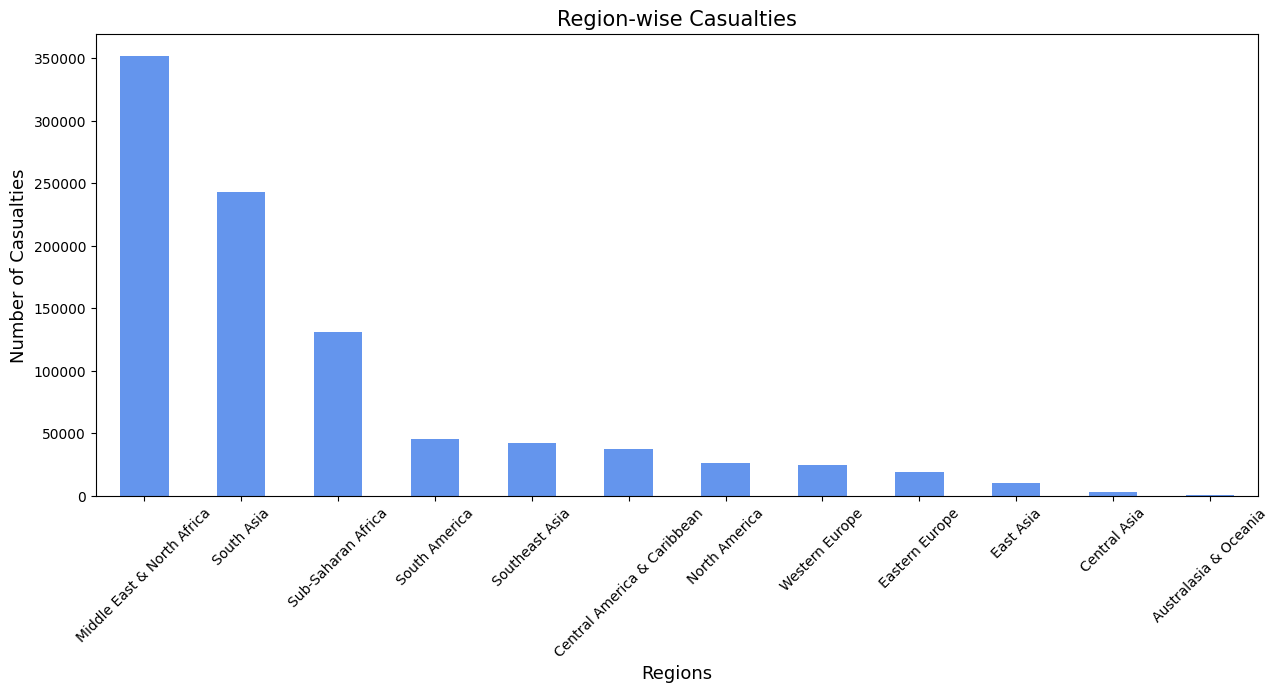

In [20]:
regional_attacks = df.groupby(['Year', 'Region']).size().unstack().fillna(0)
regional_attacks.plot(kind='area', stacked=True, figsize=(20, 10), alpha=0.5)
plt.title("Region-wise Attacks Over the Years", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)
plt.show()

# Total Terrorist Attacks in each Region
ra = df['Region'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
ra.plot(kind="bar", color="cornflowerblue")
plt.title("Total Number of Attacks in Each Region", fontsize=15)
plt.xlabel("Region", fontsize=13)
plt.ylabel("Number of Attacks", fontsize=13)
plt.xticks(rotation=45)
plt.show()

# Region-wise Casualties
rc = df.groupby("Region")["Casualty"].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
rc.plot(kind="bar", color="cornflowerblue")
plt.title("Region-wise Casualties", fontsize=15)
plt.xlabel("Regions", fontsize=13)
plt.ylabel("Number of Casualties", fontsize=13)
plt.xticks(rotation=45)
plt.show()


# City-wise Attacks (Top 10):

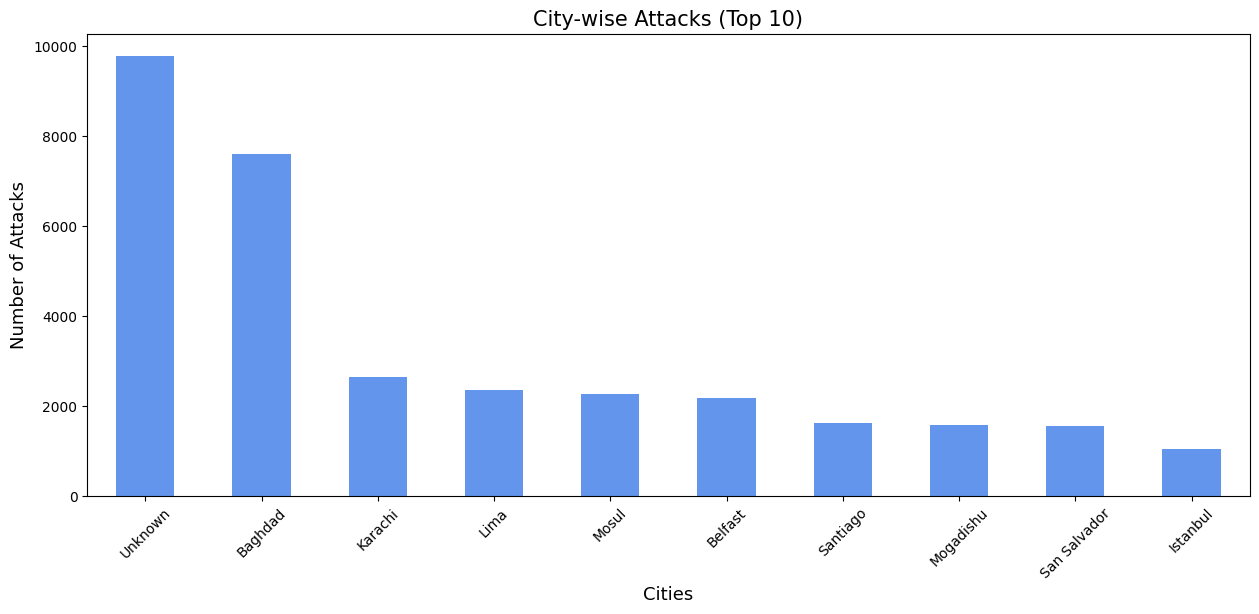

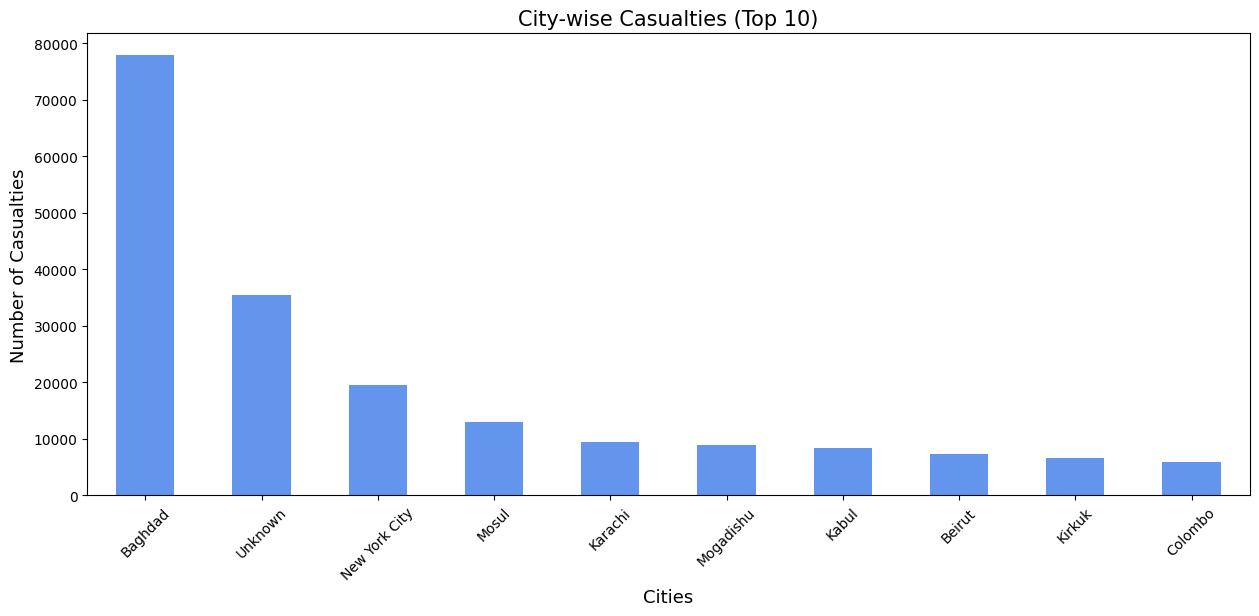

In [31]:
# Number of Attacks in each City (Top 10)
city_attacks = df["City"].value_counts().head(10)
plt.figure(figsize=(15, 6))
city_attacks.plot(kind="bar", color="cornflowerblue")
plt.title("City-wise Attacks (Top 10)", fontsize=15)
plt.xlabel("Cities", fontsize=13)
plt.ylabel("Number of Attacks", fontsize=13)
plt.xticks(rotation=45)
plt.show()

# Total Casualties (Killed + Wounded) in each City (Top 10)
city_casualties = df.groupby("City")["Casualty"].sum().sort_values(ascending=False)
top_cities_casualties = city_casualties[:10]
top_cities_casualties.plot(kind="bar", color="cornflowerblue", figsize=(15, 6))
plt.title("City-wise Casualties (Top 10)", fontsize=15)
plt.xlabel("Cities", fontsize=13)
plt.ylabel("Number of Casualties", fontsize=13)
plt.xticks(rotation=45)
plt.show()


# Terrorist Group-wise Attacks (Top 10):

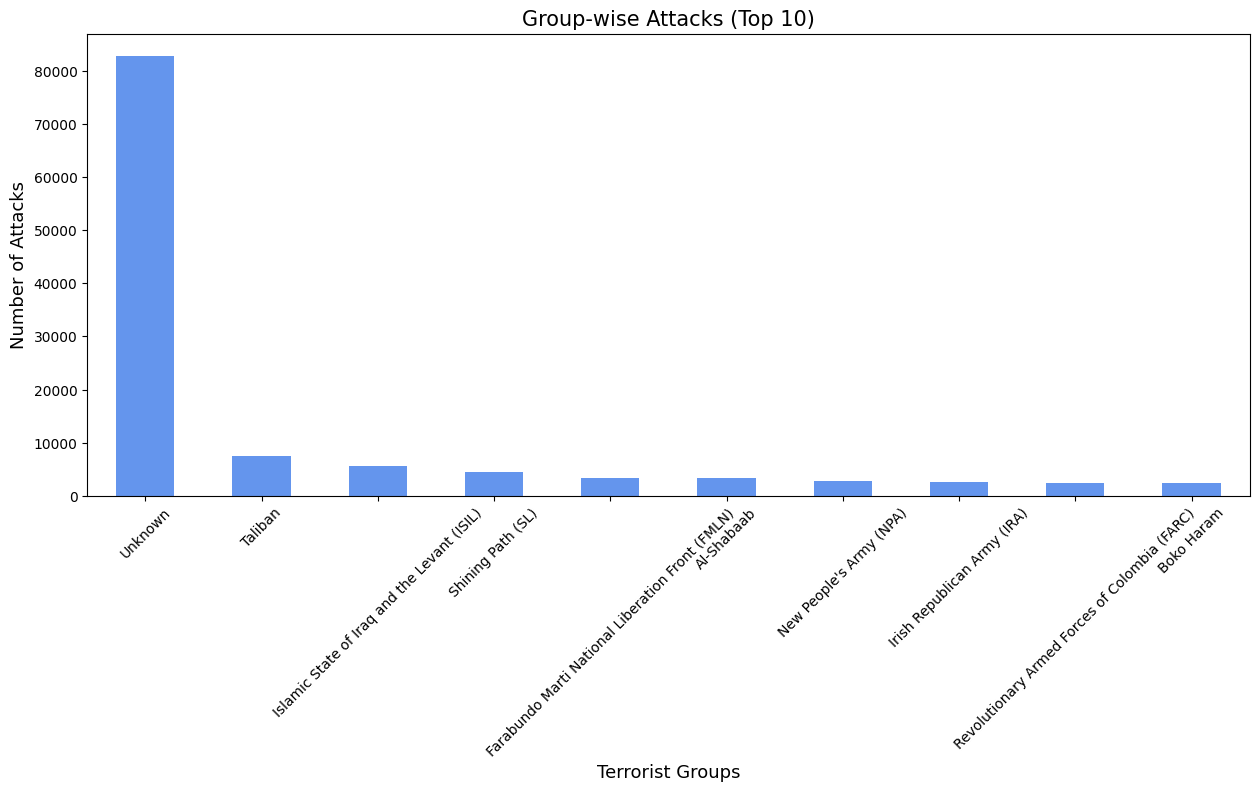

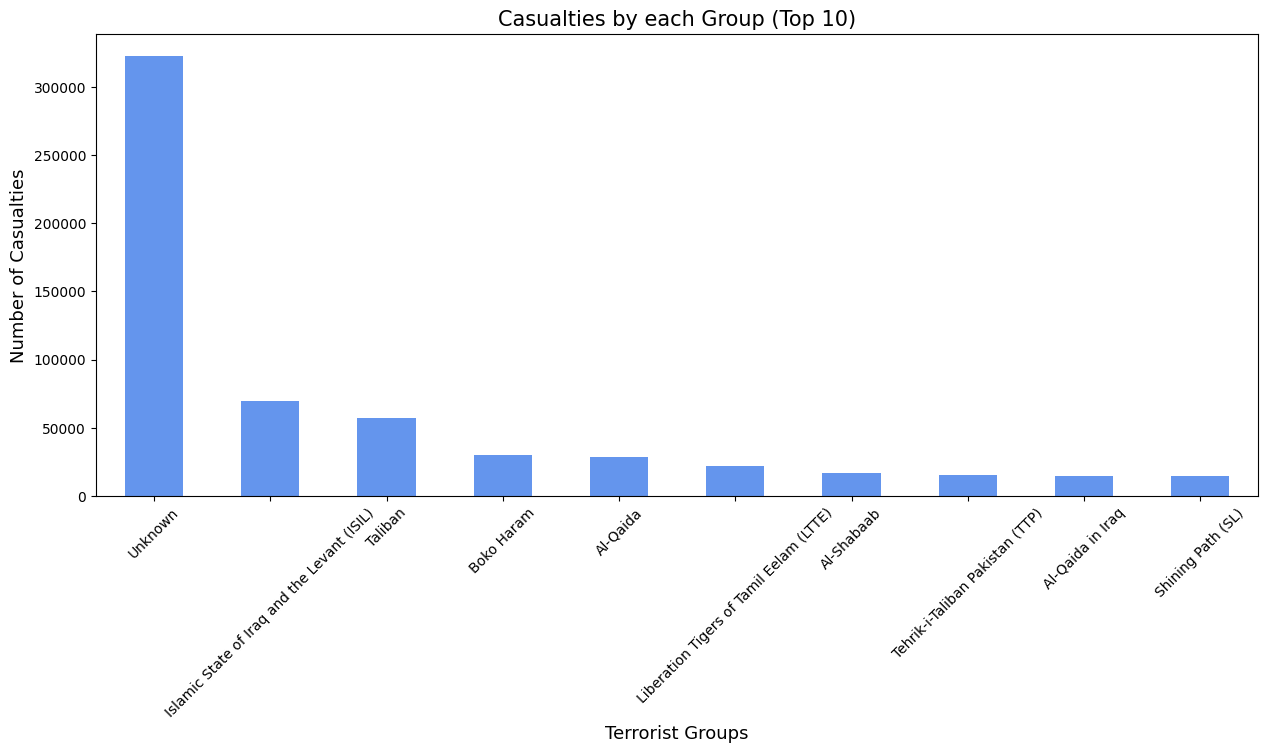

In [33]:
# Number of Attacks by each Group (Top 10)
group_attacks = df["Group Name"].value_counts().head(10)
plt.figure(figsize=(15, 6))
group_attacks.plot(kind="bar", color="cornflowerblue")
plt.title("Group-wise Attacks (Top 10)", fontsize=15)
plt.xlabel("Terrorist Groups", fontsize=13)
plt.ylabel("Number of Attacks", fontsize=13)
plt.xticks(rotation=45)
plt.show()

# Total Casualties (Killed + Wounded) by each Group (Top 10)
group_casualties = df.groupby("Group Name")["Casualty"].sum().sort_values(ascending=False)
top_groups_casualties = group_casualties[:10]
top_groups_casualties.plot(kind="bar", color="cornflowerblue", figsize=(15, 6))
plt.title("Casualties by each Group (Top 10)", fontsize=15)
plt.xlabel("Terrorist Groups", fontsize=13)
plt.ylabel("Number of Casualties", fontsize=13)
plt.xticks(rotation=45)
plt.show()


# Observations
# 1. Year wise Attacks:
#    (i) Most number of attacks (16903) occurred in 2014
#    (ii) Least number of attacks (471) occurred in 1971
# 2. Region wise Attacks:
#    (i) Most attacks occurred in "Middle East & North Africa" region
#    (ii) Least attacks occurred in "Australasia & Oceania" region
# 3. Country wise Attacks - Top 10:
#    (i) Most attacks occurred in Iraq
#    (ii) Least attacks occurred in Turkey
# ... (continue your observations for other visualizations)
# 9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017:
#    (i) Total number of Casualties: 935737
#    (ii) Total number of people killed: 411868
#    (iii) Total number of people wounded: 523869


In [38]:
            # Thank You @ Sainath.Chennoju